In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [3]:
import os

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '/Users/cremones/EPFL/PCML/pcml-project1/data/train.csv'
y, tX, ids = load_csv_data(DATA_TRAIN_PATH, sub_sample=True)
N_FEATURES=tX.shape[1]
N_SAMPLES=tX.shape[0]
print( "loaded training data: %d samples and %d features\n"%(N_SAMPLES, N_FEATURES) )

loaded training data: 5000 samples and 30 features



In [5]:
y_colors = np.array(['b']*N_SAMPLES)
y_colors[y==-1] = 'r'
y += 1.
y *= 0.5
y_vals = np.unique(y)
print(y_vals)
# If I understood correctly, -1 are bosons, i.e. boson events will be colored in red

[ 0.  1.]


In [6]:
feature_names=('DER_mass_MMC' , 'DER_mass_transverse_met_lep' , 'DER_mass_vis' , 'DER_pt_h' , 'DER_deltaeta_jet_jet' , 'DER_mass_jet_jet' , 'DER_prodeta_jet_jet' , 'DER_deltar_tau_lep' , 'DER_pt_tot' , 'DER_sum_pt' , 'DER_pt_ratio_lep_tau' , 'DER_met_phi_centrality' , 'DER_lep_eta_centrality' , 'PRI_tau_pt' , 'PRI_tau_eta' , 'PRI_tau_phi' , 'PRI_lep_pt' , 'PRI_lep_eta' , 'PRI_lep_phi' , 'PRI_met' , 'PRI_met_phi' , 'PRI_met_sumet' , 'PRI_jet_num' , 'PRI_jet_leading_pt' , 'PRI_jet_leading_eta' , 'PRI_jet_leading_phi' , 'PRI_jet_subleading_pt' , 'PRI_jet_subleading_eta' , 'PRI_jet_subleading_phi' , 'PRI_jet_all_pt')

plotting a 5 x 7 matrix


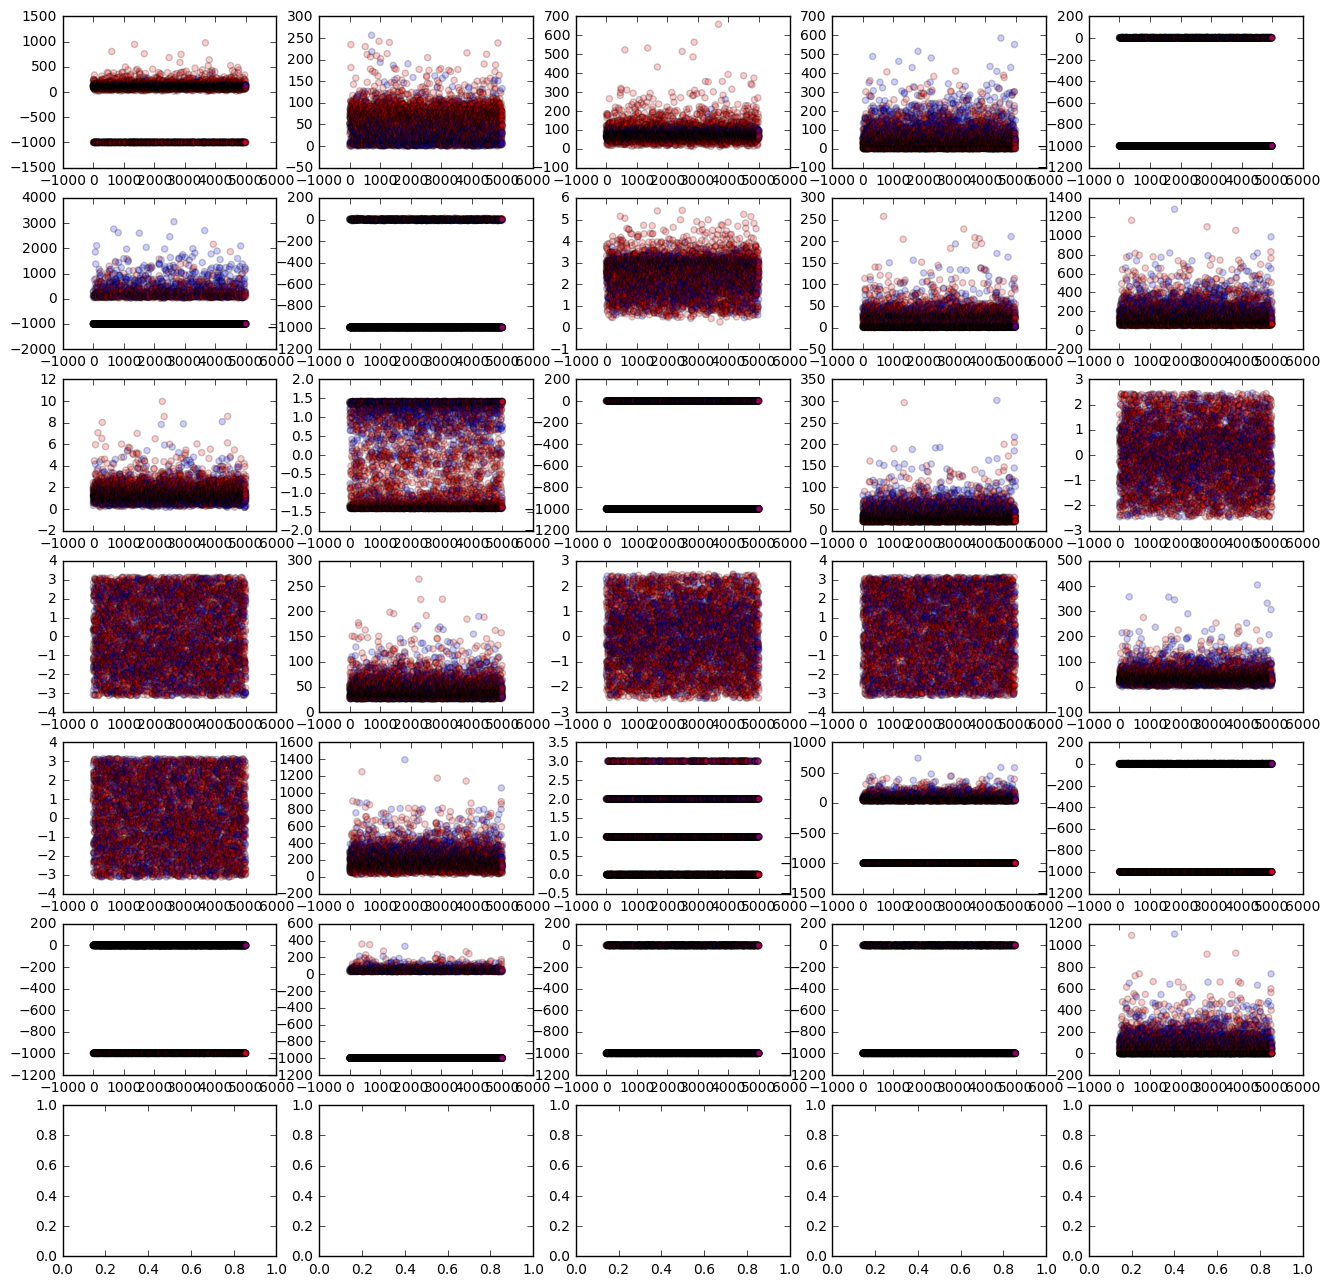

In [114]:
n_cols_plots=5
n_rows_plots=int(N_FEATURES/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < tX.shape[1]:
            ax = axes[col]
            data_to_plot=tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")

plt.savefig(figpath)
#plt.show()

## Primitive Features

In [11]:
primitive_features_indices=[index for index,name in enumerate(feature_names) if name[0:3]=='PRI']
N_PRI_FEAT=len(primitive_features_indices)
print("detected %d primitive features"%(N_PRI_FEAT))
#print(primitive_features_indices)
#for index in primitive_features_indices:
#    print(feature_names[index])

loaded training data: 5000 samples and 30 features

detected 17 primitive features


In [12]:
PRI_tX = []
for index in primitive_features_indices:
    PRI_tX.append(tX[:,index])
PRI_tX = np.array(PRI_tX).T.reshape( (N_SAMPLES,N_PRI_FEAT) )
#print(PRI_tX.shape)
#print(tX[0:3,primitive_features_indices[0]])
#print(tX[0:3,primitive_features_indices[1]])
#print(PRI_tX[0:3,:])

plotting a 4 x 5 matrix


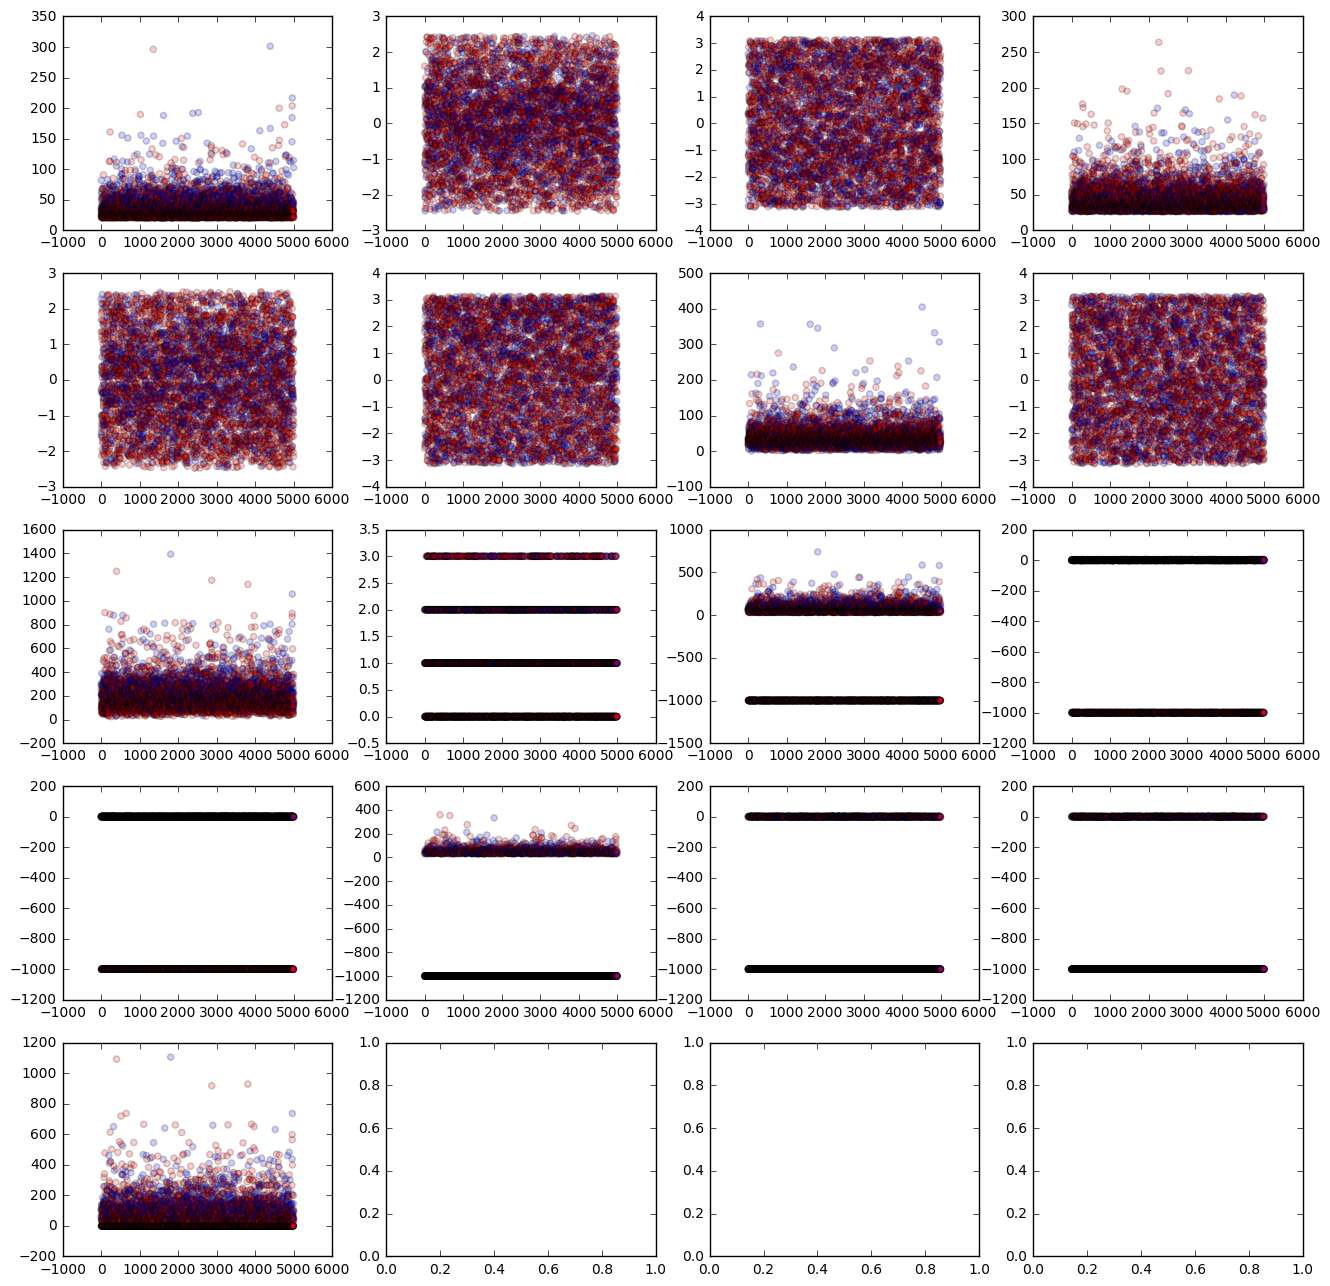

In [14]:
n_cols_plots=4
n_rows_plots=int(N_PRI_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < PRI_tX.shape[1]:
            ax = axes[col]
            data_to_plot=PRI_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")

plt.savefig(figpath)
#plt.show()

## Derived features

In [8]:
der_features_indices=[index for index,name in enumerate(feature_names) if name[0:3]=='DER']
N_DER_FEAT=len(der_features_indices)
print("detected %d primitive features"%(N_DER_FEAT))
#print(primitive_features_indices)
#for index in primitive_features_indices:
#    print(feature_names[index])

detected 13 primitive features


In [10]:
DER_tX = []
for index in der_features_indices:
    DER_tX.append(tX[:,index])
DER_tX = np.array(DER_tX).T.reshape( (N_SAMPLES,N_DER_FEAT) )
#DERnt(DER_tX.shape)
#DERnt(tX[0:3,DERmitive_features_indices[0]])
#DERnt(tX[0:3,DERmitive_features_indices[1]])
#DERnt(DER_tX[0:3,:])

plotting a 4 x 4 matrix


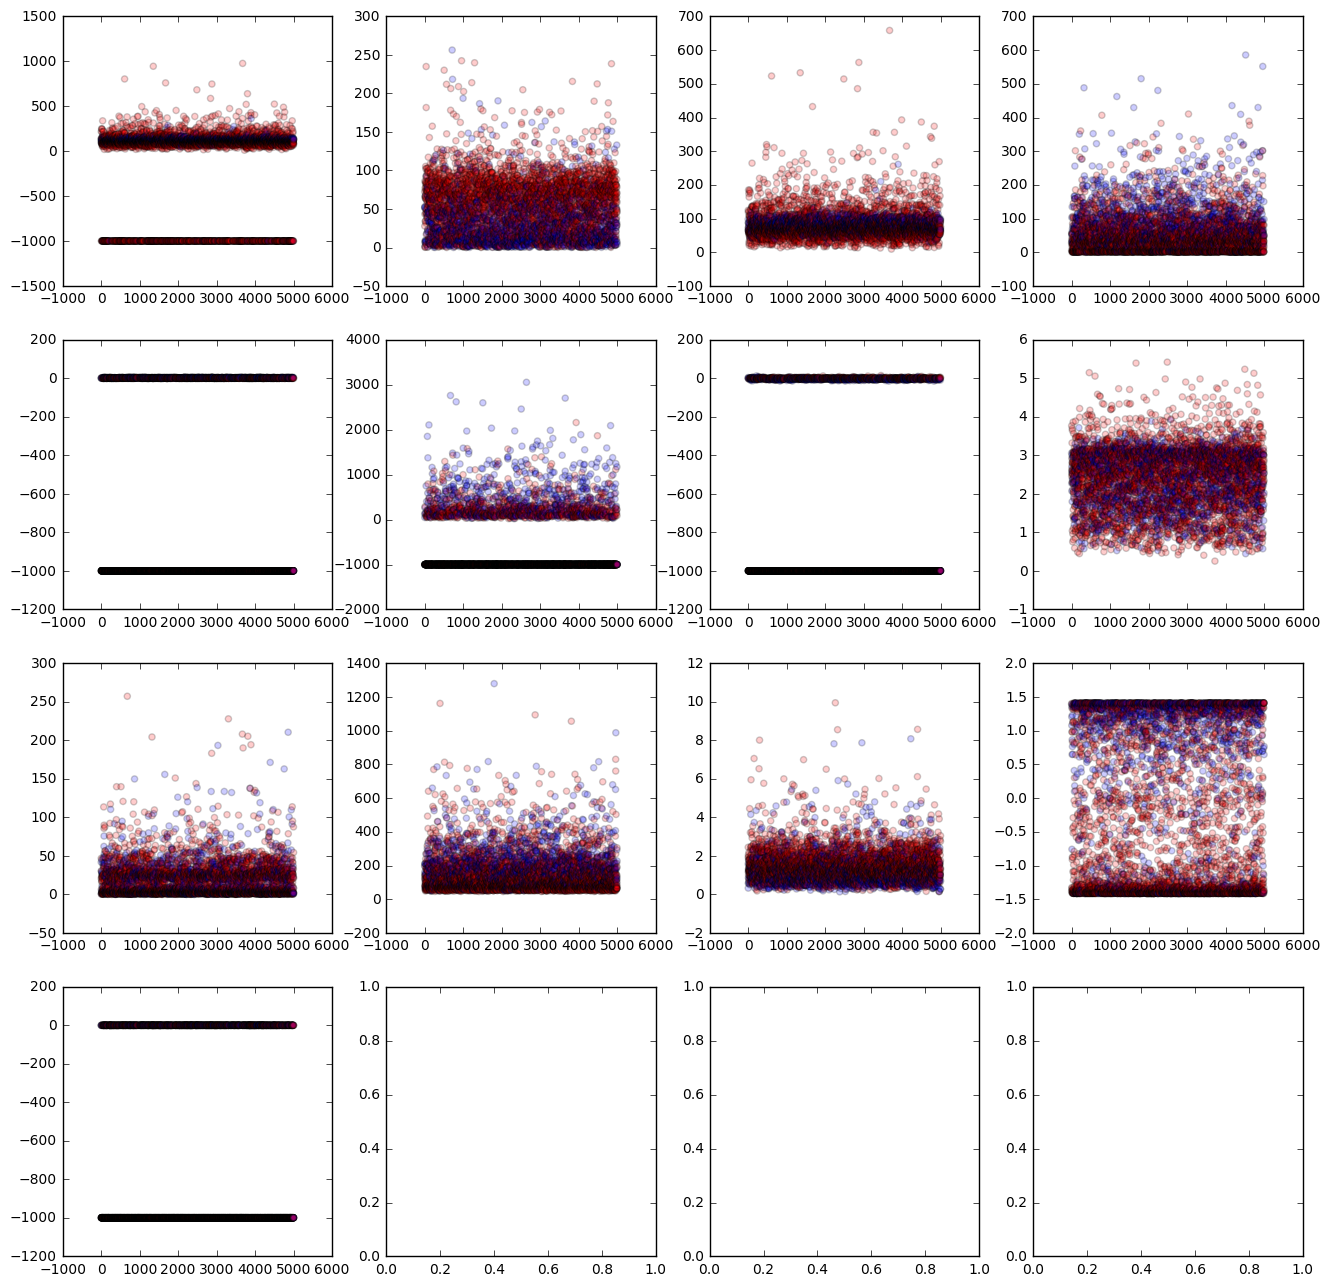

In [12]:
n_cols_plots=4
n_rows_plots=int(N_DER_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < DER_tX.shape[1]:
            ax = axes[col]
            data_to_plot=DER_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")

plt.savefig(figpath)
#plt.show()

## Remove features that have "missing data"

In [13]:
# for PRI data
#good_indices = [x for x in range(9)]
#good_indices.append(16)

# for all data
#good_indices = [1,2,3,7,8,9,10,11,13,14,15,16,17,18,19,20,21,29]


# for DER data
good_indices = [1,2,3,7,8,9,10,11]

print(good_indices)
N_WHIT_FEAT=len(good_indices)

[1, 2, 3, 7, 8, 9, 10, 11]


In [61]:
# for PRI data
#red_tX = PRI_tX[:,good_indices]
# for all data
#red_tX = tX[:,good_indices]
#for DER data
red_tX = 0.0*DER_tX[:,good_indices]

## Whiten Data

In [62]:
U, s, Vt = np.linalg.svd(red_tX, full_matrices=False)
print(U.shape)
print(s.shape)
print(Vt.shape)

(5000, 8)
(8,)
(8, 8)


In [63]:
whit_tX = U.dot(Vt)

plotting a 4 x 3 matrix


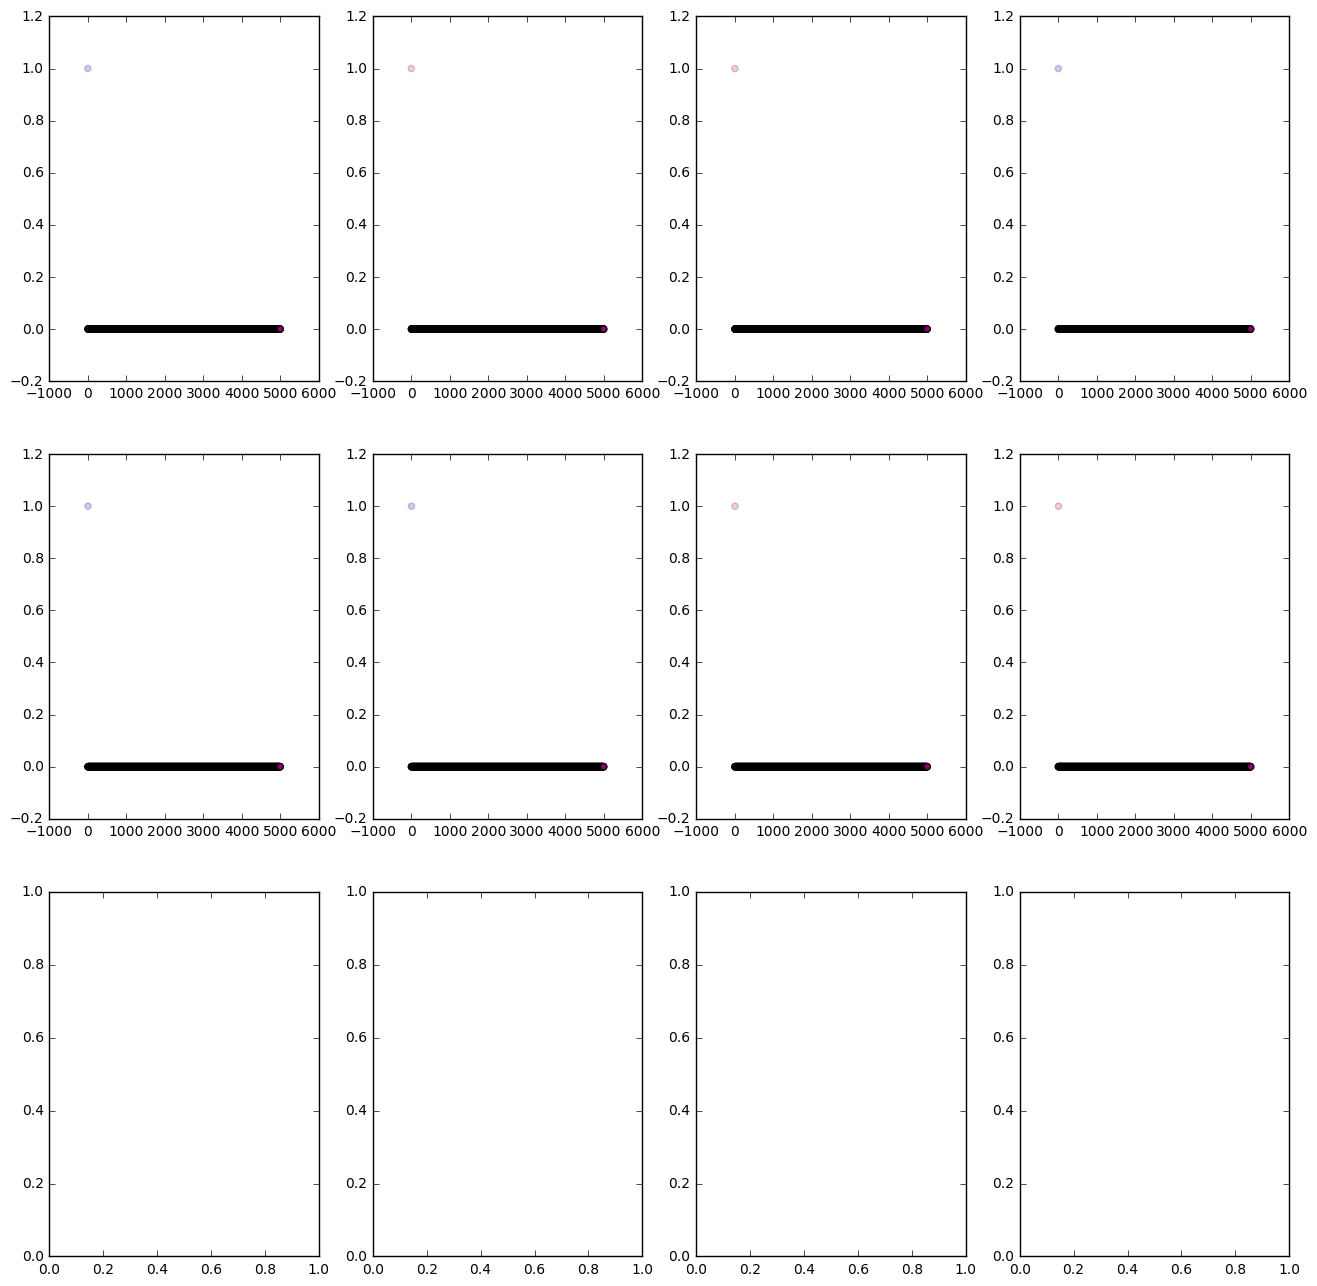

In [64]:
n_cols_plots=4
n_rows_plots=int(N_WHIT_FEAT/n_cols_plots)+1
print ( "plotting a %d x %d matrix" % (n_cols_plots, n_rows_plots))
#n_rows_plots=1
#f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, sharex='col', sharey='row')
f, ax_array = plt.subplots(n_rows_plots, n_cols_plots, figsize=(16, 16 ))

for row in range(n_rows_plots):
    axes = ax_array[row]
    for col in range(n_cols_plots):
        #ax = ax_array[row*n_cols_plots + col]
        if row*n_cols_plots + col < whit_tX.shape[1]:
            ax = axes[col]
            data_to_plot=whit_tX[:,row*n_cols_plots + col]
            ax.scatter(range(N_SAMPLES), data_to_plot, c=y_colors,alpha=0.2)
        
        
figpath=os.path.join( os.getcwd(), "..", "figures", "scatterplots.pdf")

plt.savefig(figpath)
#plt.show()

## Logistic Regression

In [19]:
def sigmoid(t):
    """apply sigmoid function on t."""
    return 1/(1+np.exp(-t))

In [40]:
def calculate_loss(y, tx, w):
    """compute the cost by negative log likelihood."""
    #print("ciao")
    #print(np.sum(np.log(1+np.exp(tx.dot(w)))))
    #print(np.sum(np.diag(y).dot( tx.dot(w) )))
    #print(np.sum(tx.dot(w)))
    #print("---------------")
    #print(np.log(1+np.exp(tx.dot(w))))
    a = np.log(1+np.exp(tx.dot(w))) - np.diag(y).dot( tx.dot(w) )
    return np.sum( a )

In [41]:
def calculate_gradient(y, tx, w):
    """compute the gradient of loss."""
    return tx.T.dot( sigmoid(tx.dot(w)) - y.reshape((tx.shape[0],1)) )


In [42]:
def learning_by_gradient_descent(y, tx, w, gamma):
    """
    Do one step of gradient descent using logistic regression.
    Return the loss and the updated w.
    """

    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y,tx, w)
    w -= gamma*grad
    
    return loss, w

In [43]:
from helpers import de_standardize
from plots import visualization

def logistic_regression_gradient_descent_demo(y, x):
    # init parameters
    max_iter = 10000
    threshold = 1e-8
    gamma = 0.001
    losses = []

    # build tx
    tx = np.c_[0.01*np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_gradient_descent(y, tx, w, gamma)
        # log info
        if iter % 100 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2]) < threshold:
            break
    return losses, w

In [36]:
losses, w_star = logistic_regression_gradient_descent_demo(y, whit_tX)
#print(w_star.shape)
#print(w_star)

ciao
3465.7359028
0.0
0.0
Current iteration=0, the loss=3465.735902799727
ciao
3465.10931493
-0.212937835679
-1.2533053323
ciao
3464.48308966
-0.425772163488
-2.50614446686
ciao
3463.85722679
-0.638503028019
-3.75851757717
ciao
3463.2317261
-0.851130473852
-5.01042483668
ciao
3462.60658737
-1.06365454556
-6.26186641885
ciao
3461.9818104
-1.27607528769
-7.5128424971
ciao
3461.35739497
-1.4883927448
-8.76335324486
ciao
3460.73334087
-1.70060696143
-10.0133988355
ciao
3460.10964788
-1.91271798209
-11.2629794424
ciao
3459.48631579


KeyboardInterrupt: 

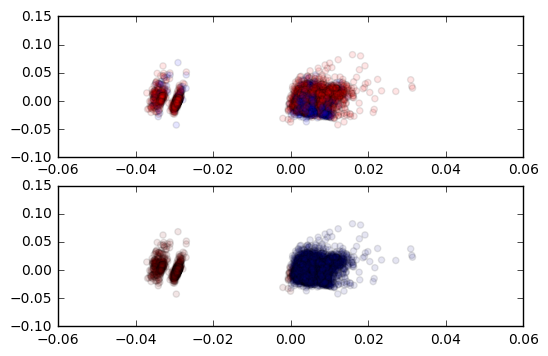

In [154]:
f = plt.figure()
ax=f.add_subplot(2,1,1)
ax.scatter(whit_tX[:,0],whit_tX[:,1], c=y_colors, alpha=0.1)

ax=f.add_subplot(2,1,2)
prediction = sigmoid(whit_tX[:,0:1].dot(w_star[1:2]))
prediction = prediction < 0.5
#ax.plot(prediction)
ax.scatter(whit_tX[:,0],whit_tX[:,1], c=prediction, alpha=0.1)



In [155]:
error = np.sum(np.abs(prediction - y.reshape(N_SAMPLES,1)))
print(error)
print(error/N_SAMPLES)

2360.0
0.472


In [44]:
def calculate_hessian(y, tx, w):
    """return the hessian of the loss function."""
    S1 = sigmoid(tx.dot(w))[:,0]
    S1 = np.diag(S1)
    #print(S1.shape)
    S2 = 1.0 - sigmoid(tx.dot(w))
    S2 = S2[:,0]
    S2 = np.diag(S2)
    #print(S2.shape)
    S = S1.dot(S2)
    return tx.T.dot(S.dot(tx))

In [45]:
def logistic_regression(y, tx, w):
    """return the loss, gradient, and hessian."""
    loss = calculate_loss(y, tx, w)
    grad = calculate_gradient(y,tx, w)
    hess = calculate_hessian(y, tx, w)
    return loss, grad, hess

In [46]:
def learning_by_newton_method(y, tx, w, gamma):
    """
    Do one step on Newton's method.
    return the loss and updated w.
    """
    loss, grad, hess = logistic_regression(y,tx,w)
    w -= gamma * np.linalg.inv(hess).dot(grad);
    return loss, w

In [49]:
def logistic_regression_newton_method_demo(y, x):
    # init parameters
    max_iter = 1000
    gamma = 0.5
    threshold = 1e-3
    lambda_ = 0.1
    losses = []

    # build tx
    tx = np.c_[np.ones((y.shape[0], 1)), x]
    w = np.zeros((tx.shape[1], 1))

    # start the logistic regression
    for iter in range(max_iter):
        # get loss and update w.
        loss, w = learning_by_newton_method(y, tx, w, gamma)
        # log info
        if iter % 1 == 0:
            print("Current iteration={i}, the loss={l}".format(i=iter, l=loss))
        # converge criteria
        losses.append(loss)
        if len(losses) > 1 and np.abs(losses[-1] - losses[-2])/np.abs(losses[-1]) < threshold:
            print("[Exit Condition Met]: Current iteration={i}, the loss={l}".format(i=iter, l=loss)) 
            break
    return losses, w

In [65]:
losses, w_star = logistic_regression_newton_method_demo(y, whit_tX)

Current iteration=0, the loss=3465.735902799727
Current iteration=1, the loss=3241.6504911940283
Current iteration=2, the loss=3182.365920960371
Current iteration=3, the loss=3166.169024989372
Current iteration=4, the loss=3161.74255522875
Current iteration=5, the loss=3160.5001356405355
[Exit Condition Met]: Current iteration=5, the loss=3160.5001356405355


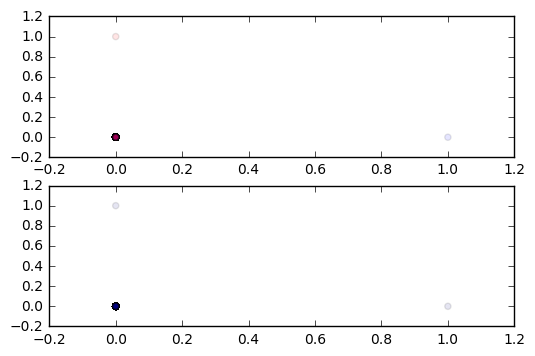

In [66]:
f = plt.figure()
ax=f.add_subplot(2,1,1)
ax.scatter(whit_tX[:,0],whit_tX[:,1], c=y_colors, alpha=0.1)

ax=f.add_subplot(2,1,2)
prediction = sigmoid(whit_tX[:,0:1].dot(w_star[1:2]))
prediction = prediction < 0.5
#ax.plot(prediction,'*')
ax.scatter(whit_tX[:,0],whit_tX[:,1], c=prediction, alpha=0.1)

In [68]:
error = np.sum(np.abs(prediction - y.reshape(N_SAMPLES,1)))
print(prediction)
print(y.reshape(N_SAMPLES,1))
print(error)
print(error/N_SAMPLES)

[[False]
 [False]
 [False]
 ..., 
 [False]
 [False]
 [False]]
[[ 1.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 0.]
 [ 1.]]
1643.0
0.3286


In [70]:
print(True - 1.0)

0.0
